# 1. Подготвяме данните с информация

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1.1. Зареждаме данните с информация на пациентите

In [8]:
# if separate executed
# df_patients = pd.read_csv('../documents/input/Colorectal_Cancer_Patient_Data.csv')

df_patients = pd.read_csv('documents/input/Colorectal_Cancer_Patient_Data.csv')
df_patients

FileNotFoundError: [Errno 2] No such file or directory: 'documents/input/Colorectal_Cancer_Patient_Data.csv'

### 1.2. Зачистваме празните редове

In [8]:
df_patients.dropna(how='any',axis=0)

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0
1,1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0
2,2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0
3,3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0
4,4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
57,57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0
58,58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0
59,59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0
60,60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0


### 1.3. Показваме информацията за колоните и типовете данни в тях

In [9]:
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       63 non-null     int64  
 1   ID_REF           62 non-null     object 
 2   Age (in years)   62 non-null     float64
 3   Dukes Stage      62 non-null     object 
 4   Gender           62 non-null     object 
 5   Location         62 non-null     object 
 6   DFS (in months)  62 non-null     float64
 7   DFS event        62 non-null     float64
 8   Adj_Radio        62 non-null     float64
 9   Adj_Chem         62 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 5.1+ KB


### 1.4. Aнализираме данните които имаме 

In [6]:
features_cat_patients = ['Age (in years)','Dukes Stage', 'Gender', 'Location', 
                'DFS event', 'Adj_Radio', 'Adj_Chem']

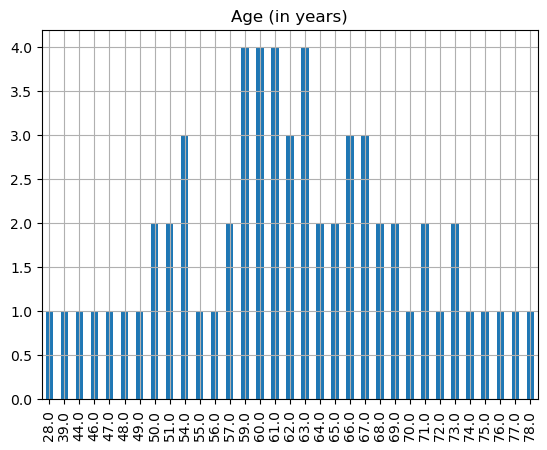

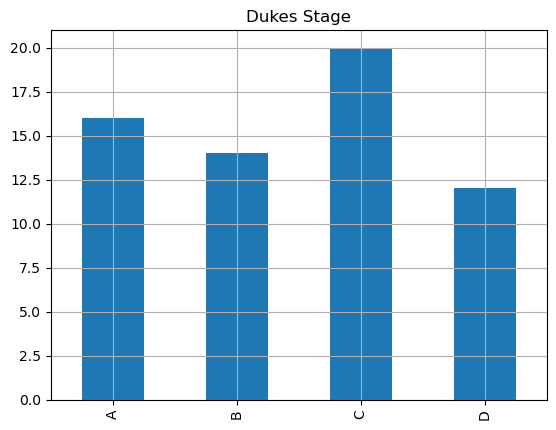

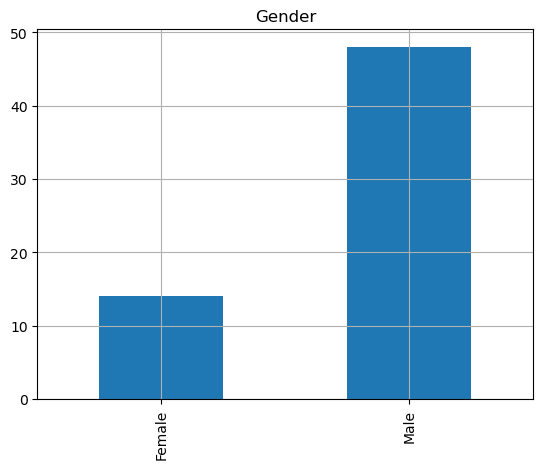

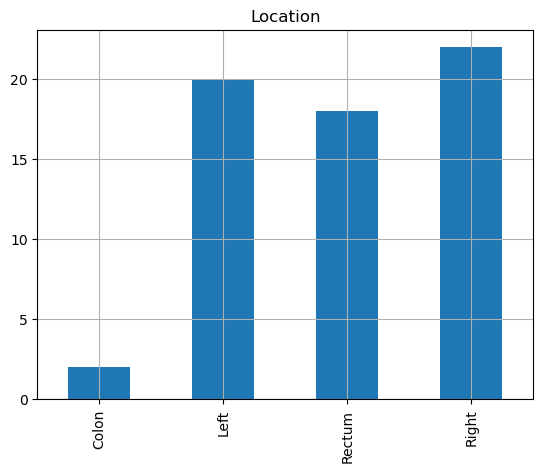

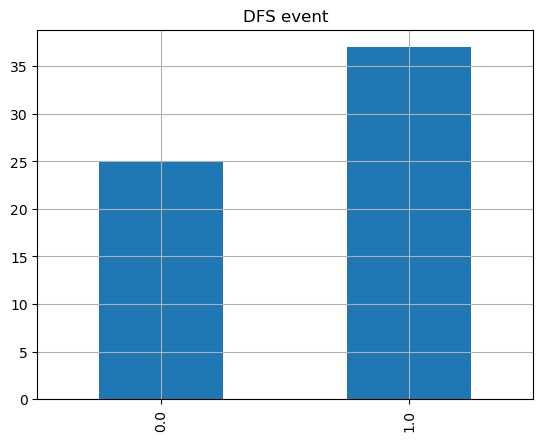

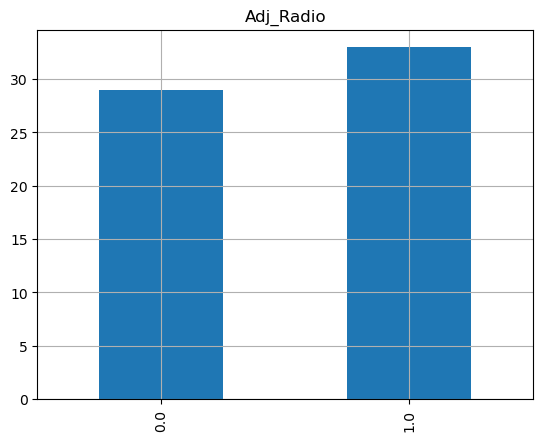

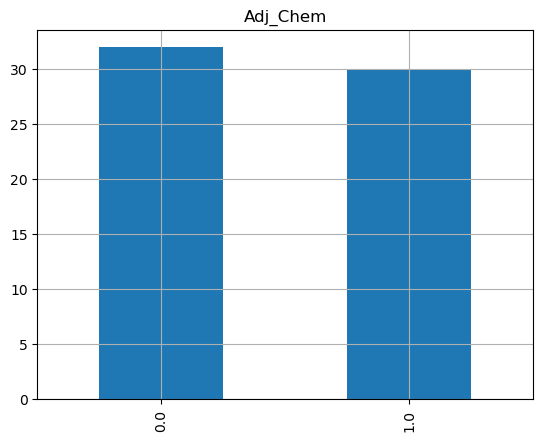

In [7]:
for f in features_cat_patients:
    df_patients[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

Подготвяме данните от изследванията за гените на всеки пациент

In [9]:
# if separate executed
# df_genes = pd.read_csv('../documents/input/Colorectal_Cancer_Gene_Expression_Data.csv')

df_genes = pd.read_csv('documents/input/Colorectal_Cancer_Gene_Expression_Data.csv')
df_genes = df_genes.transpose()

# use first content row as column headers
col_names = df_genes.iloc[1].tolist()
df_genes.columns = col_names
# now remove redundant first row
df_genes = df_genes.drop(axis=0, index='ID_REF')

#drop first row Unnamed 0:
df_genes = df_genes.iloc[1: , :]

# add ID_REF (as first column) by copying index
df_genes.insert(loc=0, column='ID_REF', value=df_genes.index)

# and reset index
df_genes = df_genes.reset_index(drop=True)

# convert to numerical
features_genes_num = df_genes.columns.tolist()[1:]
df_genes[features_genes_num] = df_genes[features_genes_num].astype(float)



FileNotFoundError: [Errno 2] No such file or directory: 'documents/input/Colorectal_Cancer_Gene_Expression_Data.csv'

### 1.5. Комбинираме данните и зачистваме празните редове

In [17]:
df_combined = df_patients.join(other=df_genes.set_index('ID_REF'), on='ID_REF', how='left')

#Зачистваме празните редове
df_comibned = df_combined.dropna(inplace=True)
df_combined

### 1.6. Записваме комбинирания файл

In [10]:
# if separate executed
# df_combined.to_csv('../documents/output/df_combined.csv')

df_combined.to_csv('documents/output/df_combined.csv')

NameError: name 'df_combined' is not defined